In [56]:
#Import libraries

import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import matplotlib.pyplot as plt
import collections, operator
warnings.filterwarnings("ignore")

In [13]:
#Dataset

df_main = pd.read_csv('Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_main.head(5))
X = df_main.values

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017


In [81]:
#Fit HMM

remodel = hmm.GaussianHMM(n_components=7, covariance_type='spherical',n_iter=100) #consider Gaussian Emissions
remodel.fit(X) #get sequence of states using Viterbi
Z = remodel.predict(X)

In [82]:
print("Hidden states samples")
counts = {}
for idx,i in enumerate(Z):
    if(idx%1000==0):
        print("State of", idx, " is ",i)
    if(i not in counts):
        counts[i]=0
    else:
        counts[i]+=1
print("Counts of each HMM are\n",counts)

Hidden states samples
State of 0  is  5
State of 1000  is  1
State of 2000  is  1
State of 3000  is  0
State of 4000  is  4
State of 5000  is  0
State of 6000  is  6
State of 7000  is  4
State of 8000  is  3
State of 9000  is  3
State of 10000  is  3
State of 11000  is  3
Counts of each HMM are
 {5: 2924, 1: 1007, 0: 2087, 3: 2723, 4: 1751, 6: 457, 2: 131}


In [83]:
print("Transition matrix")
print(remodel.transmat_)
print()

Transition matrix
[[ 0.19156921  0.09048306  0.00825274  0.2412936   0.15532401  0.2685789
   0.04449848]
 [ 0.19394093  0.08396991  0.00963732  0.23644462  0.16068319  0.26457537
   0.05074867]
 [ 0.15544203  0.06484099  0.10368193  0.22329418  0.12315354  0.24919638
   0.08039095]
 [ 0.17754623  0.09036738  0.00826439  0.25726024  0.16288035  0.26821971
   0.03546171]
 [ 0.19587136  0.09449569  0.01244449  0.23013882  0.1626856   0.25907342
   0.04529062]
 [ 0.19037575  0.08967005  0.01251033  0.24408968  0.16264056  0.26262082
   0.03809281]
 [ 0.19053795  0.1126936   0.02373151  0.24349112  0.12956882  0.24906198
   0.05091502]]



In [84]:
print("Means and vars of each hidden state")
for i in range(remodel.n_components):
    print("Hidden state {0}".format(i+1))
    print("mean = ", remodel.means_[i])
    print("var = ", np.diag(remodel.covars_[i]))
    print()

Means and vars of each hidden state
Hidden state 1
mean =  [ 2.26579604  2.29008271  2.61235543]
var =  [ 2.21119056  2.21119056  2.21119056]

Hidden state 2
mean =  [ 64.60590883  72.07171357  68.25967137]
var =  [ 418.30596423  418.30596423  418.30596423]

Hidden state 3
mean =  [ 717.66645368  767.55269668  562.00414512]
var =  [ 229799.2914084  229799.2914084  229799.2914084]

Hidden state 4
mean =  [ 15.56473443  16.61236718  17.64276961]
var =  [ 32.74567366  32.74567366  32.74567366]

Hidden state 5
mean =  [ 31.84836889  34.93425893  34.65288556]
var =  [ 112.22114697  112.22114697  112.22114697]

Hidden state 6
mean =  [ 7.1083766   7.16584982  8.05615556]
var =  [ 9.35504605  9.35504605  9.35504605]

Hidden state 7
mean =  [ 156.70952     174.60102255  151.75347074]
var =  [ 3428.32166728  3428.32166728  3428.32166728]



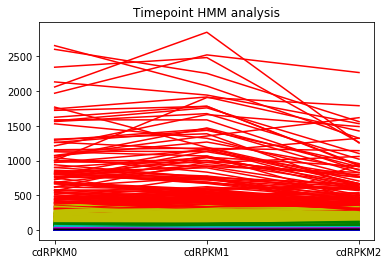

In [78]:
fig = plt.subplot(111)
colors = ['b','g','r','c','m','y','k']
var_plot_list = CDRPKM_LIST
for i in range(len(df_main)):
    fig.plot(var_plot_list, df_main.iloc[i], color = colors[Z[i]])

plt.title("Timepoint HMM analysis")
plt.show()